In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Twitter, Kkma, Okt, Mecab
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from konlpy.tag import Okt
from sklearn.decomposition import LatentDirichletAllocation
import mglearn
import pyLDAvis.gensim
import gensim
from gensim import corpora
from sklearn.feature_extraction.text import TfidfVectorizer
import stylecloud

C:\Users\SMHRD\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


###  워드클라우드 제작

In [3]:
kkma = Kkma()

In [4]:
only_BMP_pattern = re.compile("["
        u"\U00010000-\U0010FFFF" 
                           "]+", flags=re.UNICODE)

han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

mypattern = re.compile(u'\u200b')

In [2]:
stopdata = pd.read_csv("stopwords.txt")
stopword_list = []
for i in range(len(stopdata)):
    stopword_list.append(stopdata['불용어'].iloc[i])
stopwords = stopword_list + ['요','주기','방','일','진행','짐','시간','느낌','내일','문','생','주수','줄','기','테','안녕','다','오라','시작','초기','주차','맘','추천','저녁','속','이번','종일','아가','임산부','일차','가요','안',"뒤","오늘","임신","아기","주","때","전","배","정도","분","카드","확인","집","후","임","생각","하루","아침","증상","어제",'지금','병원','글']
stopwords += ['제가','검','검사','각하', '간', '개', '거나', '거리', '걸', '겁', '것과', '견지', '결과', '결론', '고려', '곤', '곳', '공동', '관', '관계', '관련', '구체', '구토', '근거', '기대', '기점', '기준', '김', '까닭', '나머지', '남', '낫다', '낼', '년도', '논', '누가', '다시', '답', '대로', '대하', '대해', '더욱이', '도달', '도착', '동시', '됏', '두번째', '듯', '따름', '때문', '라면', '리하', '마자', '막론', '만', '만이', '만큼', '만하', '말', '망정', '메', '몰랏다', '무릎', '바', '반대', '방면', '보아', '본대', '부류', '불구', '불문', '비', '비걱거리', '비교', '뿐', '사람', '상대', '서술', '수', '시오', '시초', '아래', '아무', '알', '알다', '앞', '어기', '어쨋', '어찌됏', '여보', '연관', '옆', '외', '우', '위', '위해', '윗', '의거', '의지', '의치', '이로', '이서', '이외', '이용', '이유', '인', '일반', '일지', '입', '입장', '적', '점', '제외', '젠', '종합', '주저', '중', '즈음', '지경', '진짜', '쪽', '차', '첫', '토', '통', '편이', '하든', '하자', '한적', '함', '항목', '해', '해도', '향', '형식', '힘','견','비걱'] 

NameError: name 'pd' is not defined

In [5]:
for i in range(0,1):
    data = pd.read_csv("C:\\Users\\SMHRD\\2ndPJ\\product_result\\product_result{}.csv".format(i), keep_default_na = False)
    data = data.get("제목") + " " + data.get("내용1") + " " + data.get("내용2")
    data = data.astype(str)
    data.isnull().values.any()
    content_list = []
    for j in range(len(data)):
        content_list.append(data.iloc[j])
    word_list = data
    content_result = []
    for k in range(len(word_list)):
        target = re.sub(only_BMP_pattern,"",str(word_list[k]))
        target = re.sub(han,"",target)
        target = re.sub(mypattern,"",target)
        target.replace("❤️","")
        content_result.append(target)
    sentences_tag = []
    for l in content_result:
        try:
            morph = kkma.pos(l)
            sentences_tag.append(morph)
        except:
            pass
    noun_list = []
    for sentence in sentences_tag:
        for word, tag in sentence:
            if tag in ['NNG'] and word not in stopwords:
                noun_list.append(word)
    counts = Counter(noun_list)
    tags = counts.most_common(60)
    stylecloud.gen_stylecloud(dict(tags),
                          font_path = 'C:\\Users\\SMHRD\\NanumFontSetup_TTF_ALL\\NanumBarunGothic.ttf',
                          icon_name='fas fa-heart',
                          palette = "colorbrewer.sequential.Greys_4",
                          gradient = 'vertical',
                          output_name ="age_heart{}.jpg".format(i))

C:\Users\SMHRD\Anaconda3\lib\site-packages\stylecloud\stylecloud.py:135: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  gradient = np.array(makeMappingArray(size, palette_func.mpl_colormap))


### 토픽 모델링 진행

In [3]:
data = pd.read_csv("C:\\Users\\SMHRD\\2ndPJ\\week_result\\result9.csv", keep_default_na = False)
data = data.get("제목") + " " + data.get("내용")
target = data.astype(str)

In [5]:
stopdata = pd.read_csv("stopwords.txt")
stopword_list = []
for i in range(len(stopdata)):
    stopword_list.append(stopdata['불용어'].iloc[i])
stopwords = stopword_list + ['요','주기','방','일','진행','짐','시간','느낌','내일','문','생','주수','줄','기','테','안녕','다','오라','시작','초기','주차','맘','추천','저녁','속','이번','종일','아가','임산부','일차','가요','안',"뒤","오늘","임신","아기","주","때","전","배","정도","분","카드","확인","집","후","임","생각","하루","아침","증상","어제",'지금','병원','글','뭐','뭘','보고','네이버','각하', '간', '개', '거나', '거리', '걸', '겁', '것과', '견지', '결과', '결론', '고려', '곤', '곳', '공동', '관', '관계', '관련', '구체', '구토', '근거', '기대', '기점', '기준', '김', '까닭', '나머지', '남', '낫다', '낼', '년도', '논', '누가', '다시', '답', '대로', '대하', '대해', '더욱이', '도달', '도착', '동시', '됏', '두번째', '듯', '따름', '때문', '라면', '리하', '마자', '막론', '만', '만이', '만큼', '만하', '말', '망정', '메', '몰랏다', '무릎', '바', '반대', '방면', '보아', '본대', '부류', '불구', '불문', '비', '비걱거리', '비교', '뿐', '사람', '상대', '서술', '수', '시오', '시초', '아래', '아무', '알', '알다', '앞', '어기', '어쨋', '어찌됏', '여보', '연관', '옆', '외', '우', '위', '위해', '윗', '의거', '의지', '의치', '이로', '이서', '이외', '이용', '이유', '인', '일반', '일지', '입', '입장', '적', '점', '제외', '젠', '종합', '주저', '중', '즈음', '지경', '진짜', '쪽', '차', '첫', '토', '통', '편이', '하든', '하자', '한적', '함', '항목', '해', '해도', '향', '형식', '힘','견','비걱']

In [34]:
# korean_contVec = CountVectorizer(stop_words = stopwords,
#                                  tokenizer=myTokenizer,
#                                  max_features= 1000,
#                                  ngram_range=(1,3),
#                                  min_df=2,
#                                  max_df= 0.95
#                                 )
# krvec = korean_contVec.fit_transform(target)

In [6]:
okt = Okt()
def myTokenizer(text):
    return okt.nouns(text)

In [10]:
tfidf = TfidfVectorizer(stop_words = stopwords,
                         tokenizer=myTokenizer,
                         max_features= 1000,
                         ngram_range=(1,3),
                         min_df=2,
                         max_df= 0.95,)
vecdata = tfidf.fit_transform(target)

In [15]:
lda = LatentDirichletAllocation(n_components=2, learning_method="batch",
                                max_iter = 100, random_state=0)
document_topics = lda.fit(vecdata)

In [16]:
sorting = np.argsort(lda.components_, axis=1)[:,::-1]
feature_names = np.array(tfidf.get_feature_names())

mglearn.tools.print_topics(topics=range(2), feature_names=feature_names,
                            sorting=sorting, topics_per_chunk=3, n_words=10)

topic 0       topic 1       
--------      --------      
진통            유도            
이슬            예정일           
새벽            제왕            
양수            애기            
계속            자연            
태동            입원            
통증            자궁            
피             진통            
생리통           출산            
내진            자연 진통         




### 토픽 모델링 (겐심이용) 

In [40]:
noun_list[0:10]

['있음', '계속', '수술', '바늘', '유', '분만', '은', '데', '예정일', '이슬']

In [25]:
target_bigram = gensim.models.Phrases(noun_list)
target_trigram = gensim.models.Phrases(target_bigram[noun_list])
target_bigram_model = gensim.models.phrases.Phraser(target_bigram)
target_trigram_model = gensim.models.phrases.Phraser(target_trigram)

In [35]:
target_bigram_document = [target_bigram_model[nouns] for nouns in noun_list]

In [27]:
target_id2word = corpora.Dictionary(target_bigram_document)

In [42]:
target_corpus = [target_id2word.doc2bow(doc) for doc in target_bigram_document]

[[(0, 1), (1, 1)],
 [(2, 1), (3, 1)],
 [(4, 1), (5, 1)],
 [(6, 1), (7, 1)],
 [(8, 1)],
 [(9, 1), (10, 1)],
 [(11, 1)],
 [(12, 1)],
 [(13, 1), (14, 1), (15, 1)],
 [(16, 1), (17, 1)],
 [(18, 1), (19, 1)],
 [(20, 1), (21, 1)],
 [(22, 1)],
 [(23, 1), (24, 1)],
 [(25, 1), (26, 1)],
 [(27, 1), (28, 1), (29, 1)],
 [(30, 1), (31, 1)],
 [(20, 1), (21, 1)],
 [(32, 1)],
 [(20, 1), (21, 1)],
 [(33, 1), (34, 1)],
 [(35, 1)],
 [(36, 1), (37, 1)],
 [(34, 1)],
 [(33, 1), (38, 1)],
 [(39, 1), (40, 1)],
 [(41, 1)],
 [(13, 1), (15, 1)],
 [(42, 1), (43, 1)],
 [(44, 1), (45, 1)],
 [(18, 1), (19, 1)],
 [(16, 1), (17, 1)],
 [(46, 1)],
 [(47, 1)],
 [(18, 1), (19, 1)],
 [(2, 1), (3, 1)],
 [(48, 1), (49, 1)],
 [(50, 1), (51, 1), (52, 1)],
 [(36, 1), (53, 1)],
 [(18, 1), (54, 1)],
 [(18, 1), (54, 1)],
 [(13, 1), (55, 1)],
 [(18, 1), (54, 1)],
 [(41, 1)],
 [(34, 1)],
 [(56, 1), (57, 1)],
 [(43, 1), (58, 1)],
 [(33, 1), (59, 1)],
 [(60, 1), (61, 1)],
 [(33, 1), (59, 1)],
 [(37, 1), (62, 1)],
 [(6, 1), (63, 1)],
 [

In [29]:
from gensim.models import CoherenceModel

target_coherence_score = []
for i in range(2,10):
    model = gensim.models.ldamodel.LdaModel(corpus=target_corpus, id2word=target_id2word, num_topics=i)
    coherence_model = CoherenceModel(model, texts=target_bigram_document, dictionary=target_id2word, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    print("n=",i, "#nCoherence Score : ", coherence_lda)
    target_coherence_score.append(coherence_lda)

n= 2 #nCoherence Score :  0.7102040505747095
n= 3 #nCoherence Score :  0.7161667102586987
n= 4 #nCoherence Score :  0.7075218372782723
n= 5 #nCoherence Score :  0.7175359236610436
n= 6 #nCoherence Score :  0.7117278722040133
n= 7 #nCoherence Score :  0.7128386526504481
n= 8 #nCoherence Score :  0.7021253871933413
n= 9 #nCoherence Score :  0.7083704784404703


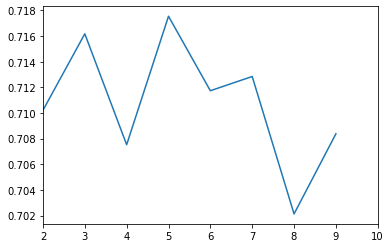

In [32]:
k = []
for i in range(2,10):
    k.append(i)

x = np.array(k)
y = np.array(target_coherence_score)
plt.title = np.array("target topic coherence")
plt.plot(x,y)
plt.xlim(2,10)
plt.show()